<a href="https://colab.research.google.com/github/Homedepot5/DataScience/blob/origin%2Ffeature%2Fdevelopment/KMean_ClusterForIrisFlower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KMean_ClusterForIrisFlower

In [1]:
import pandas as pd
import numpy as np
from sklearn import  cluster
from google.colab import files
import io
from  matplotlib import pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from sklearn import datasets

In [2]:
iris=datasets.load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

In [41]:

df=df.drop(df[['sepal length (cm)']],axis=1)
df

,sepal width (cm),petal length (cm),petal width (cm)
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,1.9
147,3.0,5.2,2.0
148,3.4,5.4,2.3


In [42]:

df=df.drop(df[['sepal width (cm)']],axis=1)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


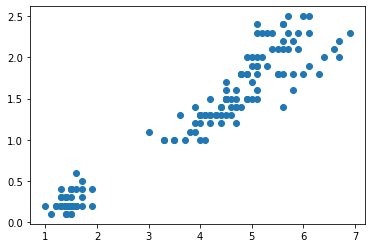

In [43]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [56]:
kmc=cluster.KMeans(n_clusters=3)
kmc

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
y_predicated=kmc.fit_predict(df[['petal length (cm)','petal width (cm)']])
df['cluster']=y_predicated
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


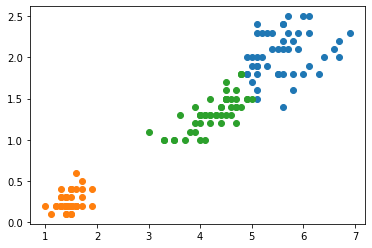

In [54]:
df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'])
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'])

In [58]:
k_rng= range(1,10)
sse=[]
for k in k_rng:
  km=cluster.KMeans(n_clusters=k)
  km.fit(df[['petal length (cm)','petal width (cm)']])
  sse.append(km.inertia_)

sse 


[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.52973359288098,
 13.916908757908757,
 11.025145110250374,
 9.340017704517706,
 7.729903295376124,
 6.571176847662142]

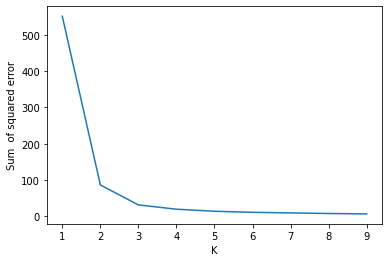

In [59]:
plt.xlabel('K')
plt.ylabel("Sum  of squared error")
##plt.scatter(k_rng,sse)
plt.plot(k_rng,sse)